In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

import numpy as np
import os

from PIL import Image
import matplotlib.pyplot as plt

from network.feature_network import FeatureNet
from co3d_utils import *

In [2]:
seq_imgs, seq_masks, seq_c2ws, seq_intrinsics = read_seq_data("./test_dataset/38_1655_5016")

./test_dataset/38_1655_5016/images/frame000007.jpg
./test_dataset/38_1655_5016/masks/frame000007.png
./test_dataset/38_1655_5016/images/frame000010.jpg
./test_dataset/38_1655_5016/masks/frame000010.png
(360, 480) (360, 480) (360, 480)
(360, 480) (360, 480)


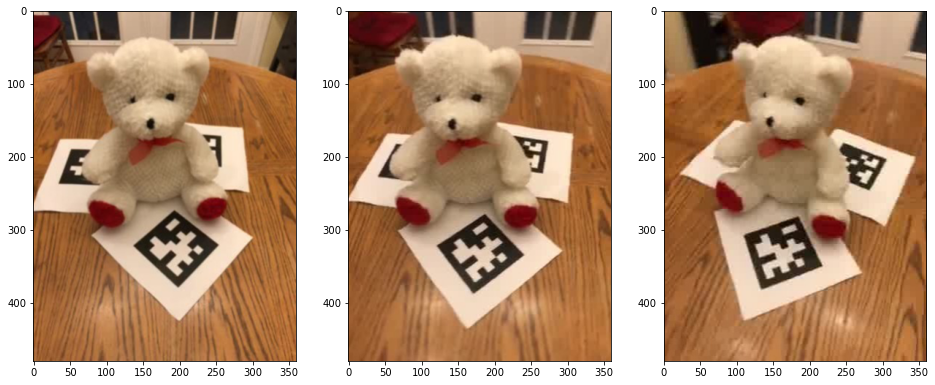

In [3]:
root_path = "./test_dataset/"

tgt_img_path = root_path + '/'.join(seq_imgs[0].split('/')[1:])

src1_img_path = root_path + '/'.join(seq_imgs[6].split('/')[1:])
src1_mask_path = root_path + '/'.join(seq_masks[6].split('/')[1:])
print(src1_img_path)
print(src1_mask_path)

src2_img_path = root_path + '/'.join(seq_imgs[9].split('/')[1:])
src2_mask_path = root_path + '/'.join(seq_masks[9].split('/')[1:])
print(src2_img_path)
print(src2_mask_path)

tgt_img = Image.open(tgt_img_path).resize((360, 480))

src1_img = Image.open(src1_img_path).resize((360, 480))
src1_mask = Image.open(src1_mask_path).resize((360, 480))

src2_img = Image.open(src2_img_path).resize((360, 480))
src2_mask = Image.open(src2_mask_path).resize((360, 480))

print(tgt_img.size, src1_img.size, src2_img.size)
print(src1_mask.size, src2_mask.size)

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(tgt_img)
plt.subplot(1, 3, 2)
plt.imshow(src1_img)
plt.subplot(1, 3, 3)
plt.imshow(src2_img)

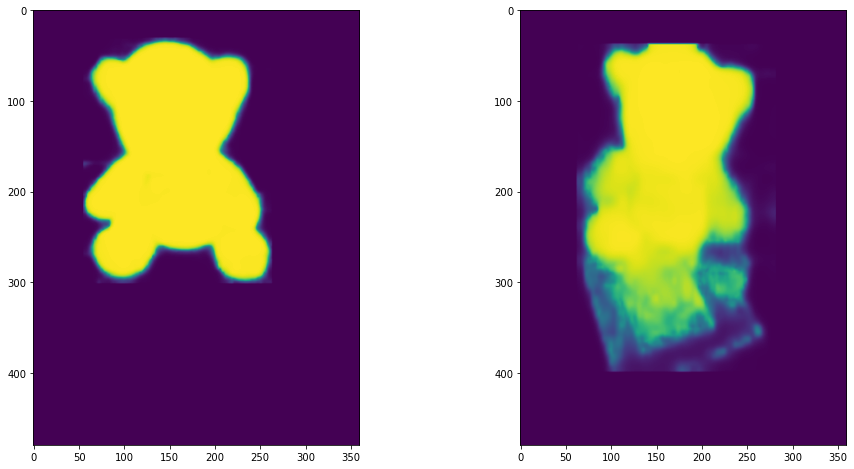

In [10]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(src1_mask)
plt.subplot(1, 2, 2)
plt.imshow(src2_mask)

In [5]:
feature_net = FeatureNet()

to_tensor = transforms.ToTensor()

src1_resnet_feature = feature_net(to_tensor(src1_img).unsqueeze(0))
src2_resnet_feature = feature_net(to_tensor(src2_img).unsqueeze(0))

print(src1_resnet_feature.shape, src2_resnet_feature.shape)

C:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


torch.Size([1, 99, 480, 360]) torch.Size([1, 99, 480, 360])


(99, 480, 360)


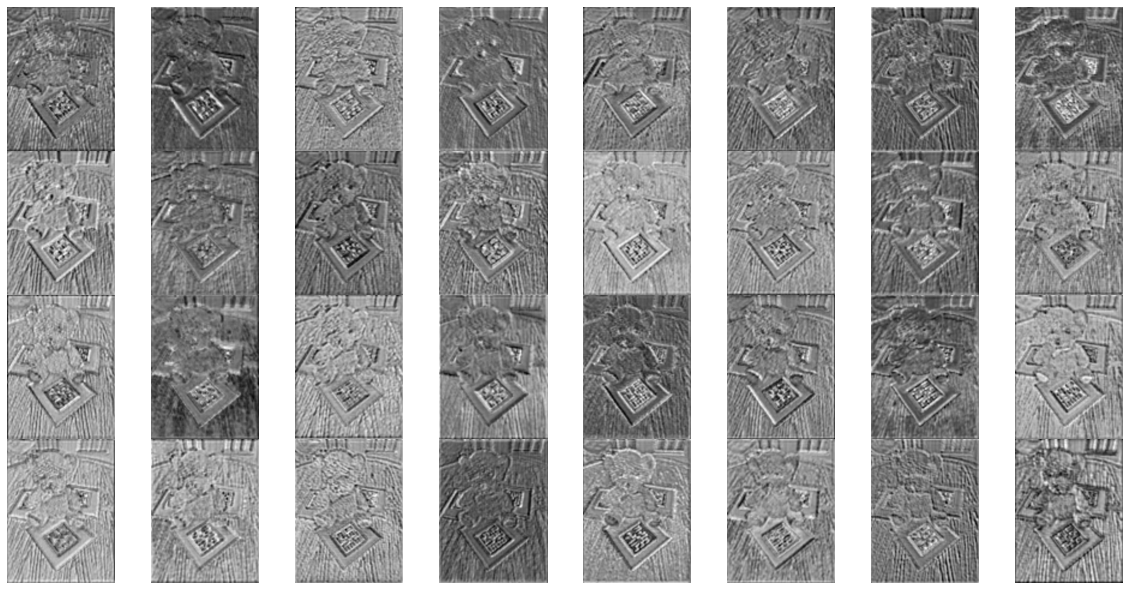

In [6]:
outputs = src1_resnet_feature[0].detach().numpy()
print(outputs.shape)


####################### (layer 1) features
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

for i in range(outputs.shape[0]):
    if i == 32: # we will visualize only 8x8 blocks from each layer
        break
    plt.subplot(4, 8, i + 1)
    plt.imshow(outputs[i, :, :], cmap='gray')
    plt.axis("off")

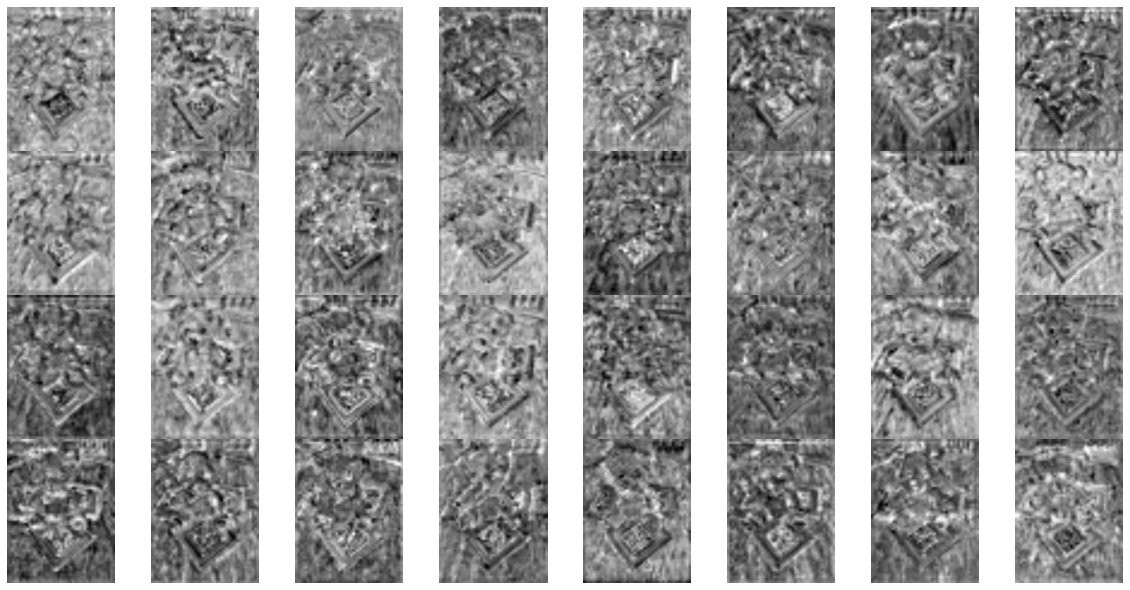

In [7]:
####################### (layer 2) features
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

for i in range(32, outputs.shape[0]):
    if i == 64: # we will visualize only 8x8 blocks from each layer
        break
    plt.subplot(4, 8, i - 31)
    plt.imshow(outputs[i, :, :], cmap='gray')
    plt.axis("off")

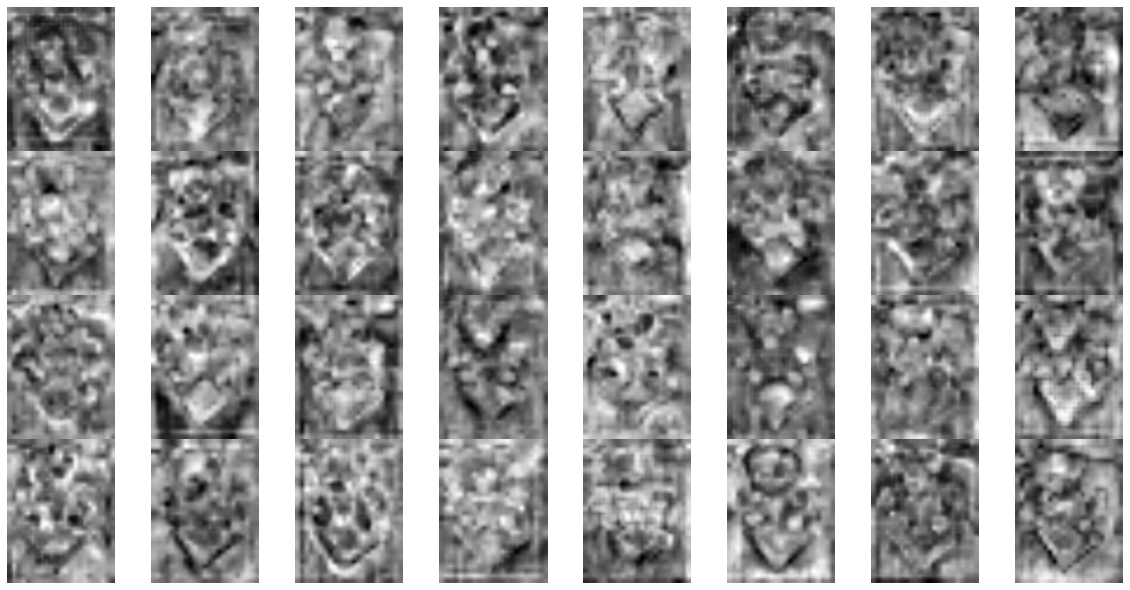

In [8]:
####################### (layer 3) features
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

for i in range(64, outputs.shape[0]):
    if i == 96: # we will visualize only 8x8 blocks from each layer
        break
    plt.subplot(4, 8, i - 63)
    plt.imshow(outputs[i, :, :], cmap='gray')
    plt.axis("off")

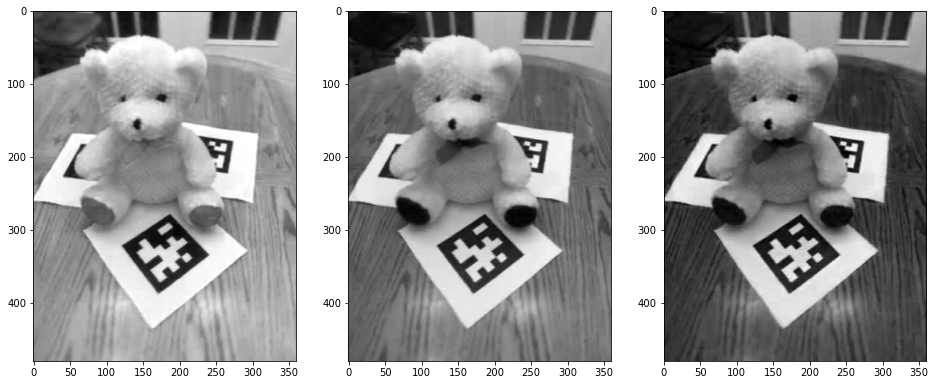

In [9]:
####################### RGB Color
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(outputs[96, :, :], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(outputs[97, :, :], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(outputs[98, :, :], cmap='gray')